In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def gaussian(x, mu, sig):
    return np.exp(-np.power((x - mu)/sig, 2.)/2)/(sig*np.sqrt(2*np.pi))

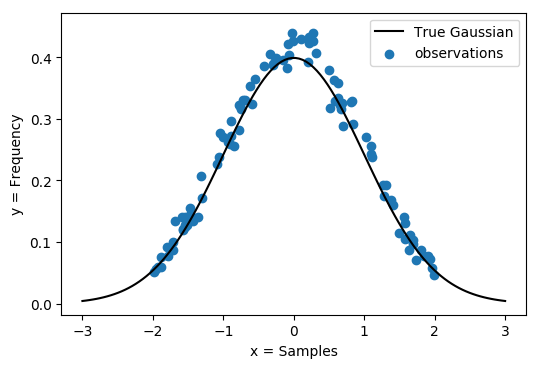

In [3]:
mu = 0
sig = 1
seed = 0
np.random.seed(seed)
x_values = np.linspace(-3*sig+mu, 3*sig+mu, 120)
xpts = np.random.normal(mu,sig, 200000);

ypts = np.histogram(xpts,bins = 1000, range = [-2*sig+mu,2*sig+mu])
width = ypts[1][2]-ypts[1][1]

data = list(zip((ypts[1][1:1001]+ypts[1][0:1000])/2, ypts[0]/ypts[0].sum()/width))
np.random.shuffle(data)
data_x, data_y = zip(*data)

train = (data_x[0:900],data_y[0:900])
test = (data_x[900:1000],data_y[900:1000])

plt.rcParams['figure.dpi'] = 100
plt.scatter(test[0],test[1], label= "observations")
plt.plot(x_values, gaussian(x_values, mu, sig), color = "black", label = "True Gaussian")
plt.xlabel('x = Samples')
plt.ylabel('y = Frequency')
plt.legend()
plt.show()

In [4]:
class Inp:
    def __init__(self,x):
        self.a = np.array([x])[:,np.newaxis]
    def calc(self):
        return self.a
    def bp(self,val,lr):
        pass
        
class Layer:
    def __init__(self,prev,size):
        self.prev = prev
        self.w = np.random.normal(0,0.1,(size,prev.a.shape[0]))
        self.b = np.zeros((size,1))
        self.a = np.matmul(self.w,prev.a)+self.b
    def calc(self):
        self.a = np.matmul(self.w,self.prev.calc())+self.b
        return self.a
    def bp(self,val,lr):
        nval = np.matmul(val,self.w)
        self.w -= lr*np.matmul(self.prev.a,val).T
        self.b -= lr*val.T
        self.prev.bp(nval,lr)

class Relu:
    def __init__(self,prev):
        self.prev = prev
        self.a = prev.a*(prev.a>0)
    def calc(self):
        self.prev.a = self.prev.calc()
        self.a = self.prev.a*(self.prev.a>0)
        return self.a
    def bp(self,val,lr):
        nval = (self.prev.a>0).T*val
        self.prev.bp(nval,lr)
        
class Sigmoid:
    def __init__(self,prev):
        self.prev = prev
        self.a = 1 / (1 + np.exp(-prev.a))
    def calc(self):
        self.a = 1 / (1 + np.exp(-self.prev.calc()))
        return self.a
    def bp(self,val,lr):
        nval = (self.a*(1-self.a)).T*val
        self.prev.bp(nval,lr)
    
class MSE:
    def __init__(self,prev,y,lr):
        self.prev = prev
        self.y = y
        self.lr = lr
    def bp(self):
        val = 2*(self.prev.a.T-self.y)
        self.prev.bp(val,self.lr)
        self.prev.calc()

In [6]:
x = Inp(train[0][0])
l1 = Layer(x,64)
l1r = Relu(l1)
l2 = Layer(l1r,64)
l2r = Relu(l2)
l3 = Layer(l2r,64)
l4 = Layer(l3,1) 
l5 = Sigmoid(l4)
loss = MSE(l5,train[1][0],0.1)

In [7]:
for i in range(20):
    for i in range(900):
        x.a = np.array([train[0][i]])[:,np.newaxis]
        loss.y = train[1][i]
        l5.calc()
        loss.bp()

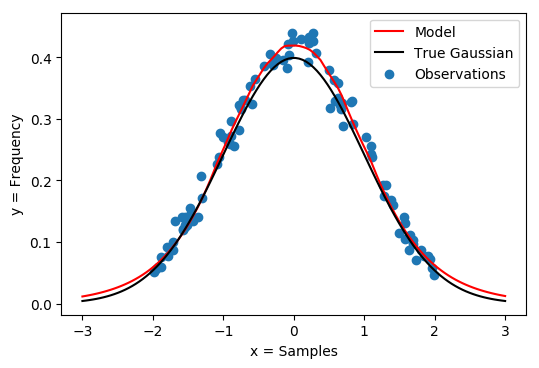

In [8]:
ans = np.zeros(x_values.size)
for i in range(x_values.size):
    x.a = np.array([x_values[i]])[:,np.newaxis]
    ans[i] = l5.calc()
plt.scatter(test[0],test[1], label = "Observations")   
plt.plot(x_values,ans, color = "red", label = "Model")
plt.plot(x_values, gaussian(x_values, mu, sig), color = "black", label = "True Gaussian")
plt.xlabel('x = Samples')
plt.ylabel('y = Frequency')
plt.legend()
plt.show()